# TasK 2 : Using the Pandas library, load a CSV file and perform basic data analysis tasks, such as calculating the average of a selected column. Additionally, use Matplotlib to create visualizations, including bar charts, scatter plots, and heatmaps, to analyze the data. Provide insights and observations based on the analysis and visualizations.
# Kaggle Data Set CSV FILE LINK :- https://www.kaggle.com/datasets/rakeshkapilavai/ai-tool-usage-by-indian-college-students-2025?resource=download

# AI Tool Usage by Indian College Students 2025
# Unique survey data on AI tool impact in academics

In this notebook, we will:
- Load a dataset (`Students.csv`)
- Perform basic data wrangling and EDA
- Use Pandas for summarization
- Visualize patterns using Matplotlib and Seaborn
- Train a simple machine learning model to predict device usage


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:

df = pd.read_csv("Students.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()


,student_name,college_name,stream,year_of_study,ai_tools_used,daily_usage_hours,use_cases,trust_in_ai_tools,impact_on_grades,do_professors_allow_use,preferred_ai_tool,awareness_level,willing_to_pay_for_access,state,device_used,internet_access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium


In [33]:
df.info()
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_name               2000 non-null   object 
 1   college_name               2000 non-null   object 
 2   stream                     2000 non-null   object 
 3   year_of_study              2000 non-null   int64  
 4   ai_tools_used              2000 non-null   object 
 5   daily_usage_hours          2000 non-null   float64
 6   use_cases                  2000 non-null   object 
 7   trust_in_ai_tools          2000 non-null   int64  
 8   impact_on_grades           2000 non-null   int64  
 9   do_professors_allow_use    2000 non-null   object 
 10  preferred_ai_tool          2000 non-null   object 
 11  awareness_level            2000 non-null   int64  
 12  willing_to_pay_for_access  2000 non-null   object 
 13  state                      2000 non-null   objec

In [4]:

df = df.dropna()


In [7]:

df['device_used'].value_counts()
df.groupby('device_used')['year_of_study'].mean()


device_used
Laptop    2.517493
Mobile    2.541925
Tablet    2.558209
Name: year_of_study, dtype: float64

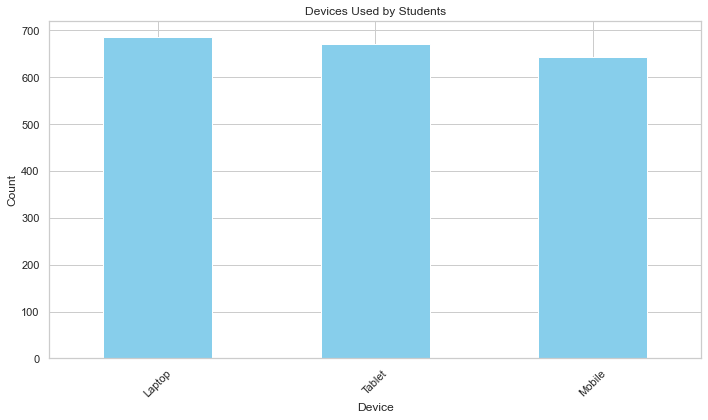

In [9]:

df['device_used'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Devices Used by Students')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


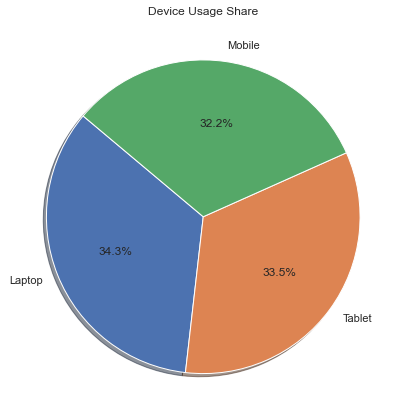

In [11]:

df['device_used'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Device Usage Share")
plt.ylabel("")
plt.tight_layout()
plt.show()


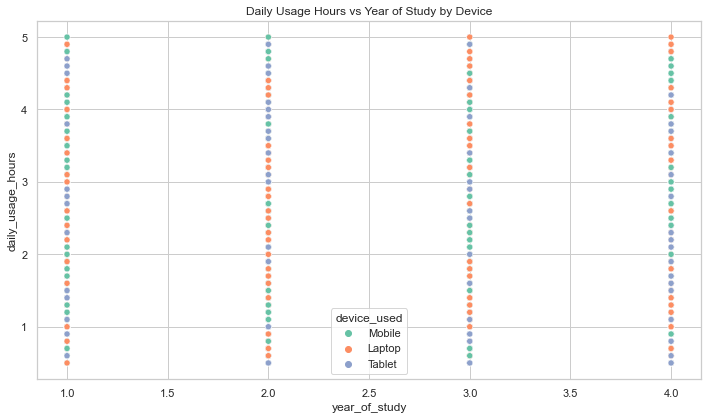

In [13]:

sns.scatterplot(data=df, x='year_of_study', y='daily_usage_hours', hue='device_used', palette='Set2')
plt.title("Daily Usage Hours vs Year of Study by Device")
plt.tight_layout()
plt.show()


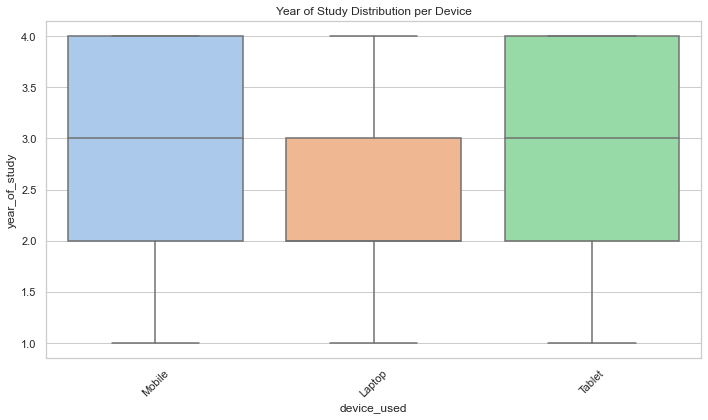

In [16]:

sns.boxplot(data=df, x='device_used', y='year_of_study', palette='pastel')
plt.title("Year of Study Distribution per Device")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


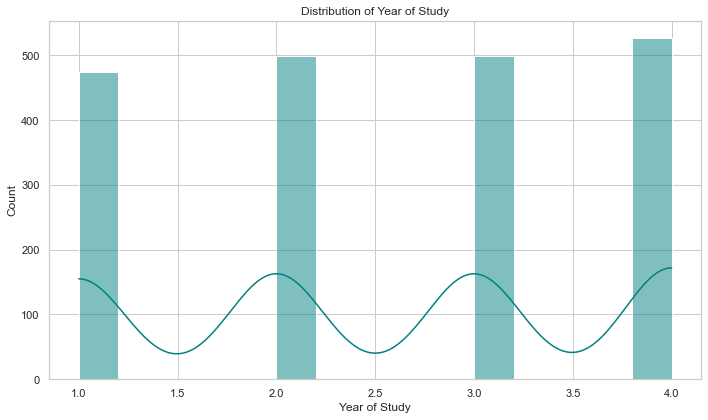

In [18]:

sns.histplot(df['year_of_study'], bins=15, kde=True, color='teal')
plt.title("Distribution of Year of Study")
plt.xlabel("Year of Study")
plt.tight_layout()
plt.show()


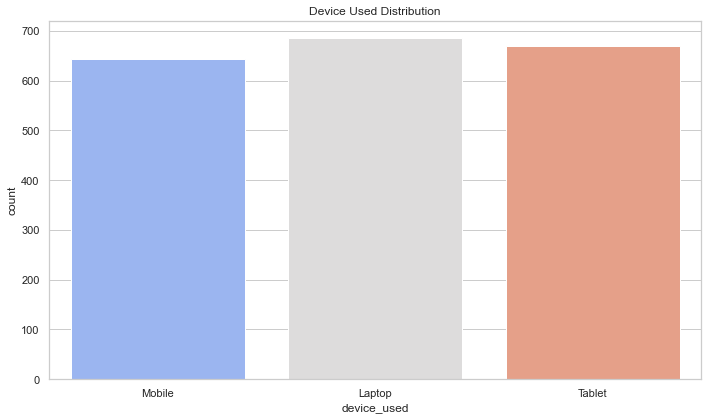

In [22]:

sns.countplot(data=df, x='device_used', palette='coolwarm')
plt.title("Device Used Distribution")
plt.tight_layout()
plt.show()


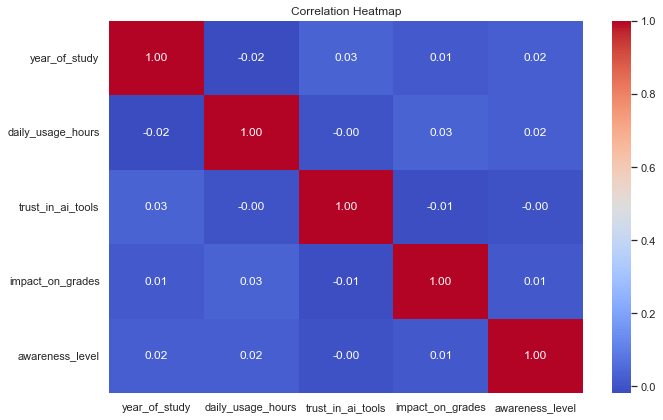

In [23]:

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
# Computed required summary statistics
device_counts = df['device_used'].value_counts()
tool_counts = df['preferred_ai_tool'].value_counts()
year_counts = df['year_of_study'].value_counts()
all_tools = df['preferred_ai_tool']
device_year = df.groupby('year_of_study')['device_used'].value_counts().unstack(fill_value=0)

print("Overview Summary:")
print(f"Most common device: {device_counts.idxmax()} ({device_counts.max()} students)")
print(f"Most popular AI tool: {tool_counts.idxmax()} ({tool_counts.max()} students)")
print(f"Year with most students: {year_counts.idxmax()} ({year_counts.max()} students)")
print(f"Total students surveyed: {len(df)}")
print(f"Number of unique AI tools mentioned: {all_tools.nunique()}")
print(f"Device distribution:\n{device_counts.to_string()}")
print(f"AI tool distribution:\n{tool_counts.to_string()}")
print(f"Year-wise device usage:\n{device_year}")


Overview Summary:
Most common device: Laptop (686 students)
Most popular AI tool: ChatGPT (433 students)
Year with most students: 4 (527 students)
Total students surveyed: 2000
Number of unique AI tools mentioned: 6
Device distribution:
Laptop    686
Tablet    670
Mobile    644
AI tool distribution:
ChatGPT    433
Copilot    432
Gemini     424
Other      403
Claude     157
Bard       151
Year-wise device usage:
device_used    Laptop  Mobile  Tablet
year_of_study                        
1                 156     158     161
2                 189     146     164
3                 171     173     155
4                 170     167     190


## Machine Learning Model: Predicted Device Usage

In [ ]:

features = ['year_of_study']
if 'gender' in df.columns:
	features.append('gender')

df_clean = df[features + ['device_used']].dropna().copy()

if 'gender' in df_clean.columns:
	le_gender = LabelEncoder()
	df_clean['gender_encoded'] = le_gender.fit_transform(df_clean['gender'])
	X = df_clean[['year_of_study', 'gender_encoded']]
else:
	X = df_clean[['year_of_study']]

le_device = LabelEncoder()
df_clean['device_encoded'] = le_device.fit_transform(df_clean['device_used'])
y = df_clean['device_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_device.classes_))


🎯 Accuracy: 0.3475

📊 Classification Report:
              precision    recall  f1-score   support

      Laptop       0.34      0.54      0.42       127
      Mobile       0.00      0.00      0.00       135
      Tablet       0.36      0.51      0.42       138

    accuracy                           0.35       400
   macro avg       0.23      0.35      0.28       400
weighted avg       0.23      0.35      0.28       400



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predict device type for new/future students based on year_of_study
# Example: predict for students in year 1, 2, 3, 4

future_years = pd.DataFrame({'year_of_study': [1, 2, 3, 4]})
future_device_encoded = model.predict(future_years)
future_device_labels = le.inverse_transform(future_device_encoded.round().astype(int)) # type: ignore

for year, device in zip(future_years['year_of_study'], future_device_labels):
    print(f"Predicted device for year_of_study={year}: {device}")


Predicted device for year_of_study=1: Mobile
Predicted device for year_of_study=2: Mobile
Predicted device for year_of_study=3: Mobile
Predicted device for year_of_study=4: Mobile



## ✅ Summary

We have now:
- Explored and cleaned the dataset
- Built visualizations with Matplotlib and Seaborn
- Trained a Random Forest classifier to predict device type
- Observed model performance with accuracy and classification report
